In [18]:
import pandas as pd
# import plotly.offline as py
# import plotly.graph_objs as graph_objs
import numpy as np
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('data.csv')
df.head()

,district,Total Calls,Emergency Calls,Road Accidents,Medical,Fire,Building Collapse,Crime Incidents,Drowning,Explosion,Misc,Fake Calls,Patients Rescued
0,Lahore,19008571,1024477,474873,438171,29943,1429,25472,984,409,53196,1755,1014268
1,Rawalpindi,6847824,176946,73761,78969,7718,145,5466,216,142,10529,155,191363
2,Faisalabad,9172915,519353,200160,233372,12832,1324,26946,702,130,43887,214,543478
3,Multan,6318038,376382,123717,215388,7231,303,10313,305,57,19068,174,421227
4,Gujranwala,6740694,316323,126572,137369,7602,467,11893,585,256,31579,336,319947


In [20]:
dfg = gpd.read_file('PAK_adm3.geojson')

In [21]:
dfg.head(200)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,1,Bagh,District,District,None,None,"POLYGON ((74.04134 33.79899, 74.01820 33.81957..."
1,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,2,Bhimber,District,District,None,None,"POLYGON ((74.39078 32.80176, 74.38804 32.80345..."
2,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,3,Kotli,District,District,None,None,"POLYGON ((74.01398 33.25094, 73.98954 33.25413..."
3,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,4,Mirpur,District,District,None,None,"POLYGON ((73.75381 32.97959, 73.75106 32.99541..."
4,171,PAK,Pakistan,1,Azad Kashmir,1,Azad Kashmir,5,Muzaffarabad,District,District,None,None,"POLYGON ((73.88432 34.06136, 73.88322 34.04995..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,171,PAK,Pakistan,8,Sind,32,Sukkur,137,Ghotki,District,District,None,None,"POLYGON ((70.18079 27.85514, 70.15695 27.83405..."
137,171,PAK,Pakistan,8,Sind,32,Sukkur,138,Khairpur,District,District,None,None,"POLYGON ((68.89733 26.45827, 68.88197 26.45272..."
138,171,PAK,Pakistan,8,Sind,32,Sukkur,139,Naushahro Firoz,District,District,None,None,"POLYGON ((68.34147 26.64828, 68.31003 26.63708..."
139,171,PAK,Pakistan,8,Sind,32,Sukkur,140,Nawab Shah,District,District,None,Nawabshah,"POLYGON ((67.91364 26.30041, 67.91261 26.30302..."


In [22]:
df_new = dfg[['NAME_1','NAME_2','NAME_3','geometry']]

In [23]:
df_new.rename(columns={'NAME_2':'division','NAME_1':'province','NAME_3':'district'}, inplace=True)

In [24]:
df_new.head()

,province,division,district,geometry
0,Azad Kashmir,Azad Kashmir,Bagh,"POLYGON ((74.04134 33.79899, 74.01820 33.81957..."
1,Azad Kashmir,Azad Kashmir,Bhimber,"POLYGON ((74.39078 32.80176, 74.38804 32.80345..."
2,Azad Kashmir,Azad Kashmir,Kotli,"POLYGON ((74.01398 33.25094, 73.98954 33.25413..."
3,Azad Kashmir,Azad Kashmir,Mirpur,"POLYGON ((73.75381 32.97959, 73.75106 32.99541..."
4,Azad Kashmir,Azad Kashmir,Muzaffarabad,"POLYGON ((73.88432 34.06136, 73.88322 34.04995..."


In [25]:
df_new['province'].unique()

array(['Azad Kashmir', 'Baluchistan', 'F.A.T.A.', 'F.C.T.', 'N.W.F.P.',
       'Northern Areas', 'Punjab', 'Sind'], dtype=object)

In [26]:
df_new['province']=df_new['province'].map({'N.W.F.P.':'KPK','Azad Kashmir':'Azad Kashmir','Baluchistan':'Balochistan',
                                           'F.A.T.A.':'KPK','F.C.T.':'Capital','Punjab':'Punjab','Sind':'Sindh',
                                           'Northern Areas':'Gilgit-Baltistan'})
df_new

/home/drogon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,province,division,district,geometry
0,Azad Kashmir,Azad Kashmir,Bagh,"POLYGON ((74.04134 33.79899, 74.01820 33.81957..."
1,Azad Kashmir,Azad Kashmir,Bhimber,"POLYGON ((74.39078 32.80176, 74.38804 32.80345..."
2,Azad Kashmir,Azad Kashmir,Kotli,"POLYGON ((74.01398 33.25094, 73.98954 33.25413..."
3,Azad Kashmir,Azad Kashmir,Mirpur,"POLYGON ((73.75381 32.97959, 73.75106 32.99541..."
4,Azad Kashmir,Azad Kashmir,Muzaffarabad,"POLYGON ((73.88432 34.06136, 73.88322 34.04995..."
...,...,...,...,...
136,Sindh,Sukkur,Ghotki,"POLYGON ((70.18079 27.85514, 70.15695 27.83405..."
137,Sindh,Sukkur,Khairpur,"POLYGON ((68.89733 26.45827, 68.88197 26.45272..."
138,Sindh,Sukkur,Naushahro Firoz,"POLYGON ((68.34147 26.64828, 68.31003 26.63708..."
139,Sindh,Sukkur,Nawab Shah,"POLYGON ((67.91364 26.30041, 67.91261 26.30302..."


In [27]:
df_punjab = df_new[df_new['province']=='Punjab']
len(df_punjab)

38

In [28]:
# df_punjab.to_csv('punjab_districts.csv')

In [29]:
df_districts = df_new[['district','geometry']]
df_districts.head()

,district,geometry
0,Bagh,"POLYGON ((74.04134 33.79899, 74.01820 33.81957..."
1,Bhimber,"POLYGON ((74.39078 32.80176, 74.38804 32.80345..."
2,Kotli,"POLYGON ((74.01398 33.25094, 73.98954 33.25413..."
3,Mirpur,"POLYGON ((73.75381 32.97959, 73.75106 32.99541..."
4,Muzaffarabad,"POLYGON ((73.88432 34.06136, 73.88322 34.04995..."


In [30]:
# df_districts.to_file('pak_districts.geojson',driver='GeoJSON')

In [32]:
# df_punjab.to_file('punjab_districts.geojson',driver='GeoJSON')

In [33]:
data = graph_objs.Data([
    graph_objs.Scattermapbox(
        lat=['30.3753'],
        lon=['69.3451'],
        mode='markers',  
        text = df_districts['district']
    )
])

layout = dict(
    height=600,
    autosize=True,
    hovermode='closest',
    margin=dict(t=0,r=0,l=0,b=0),
    mapbox=dict(
        layers=[
            dict(
                sourcetype = 'geojson',
                source = 'pak_districts.geojson',
                type = 'fill',
                color = 'rgba(26,188,156 ,1)'
            )
        ],
        accesstoken=''pk.eyJ1IjoiY2hyaWRkeXAiLCJhIjoiRy1GV1FoNCJ9.yUPu7qwD_Eqf_gKNzDrrCQ',
        bearing=0,
        center=dict(
            lat=30.3753,
            lon=69.3451
        ),
        pitch=0,
        zoom=4.5,
        style='light'        
    )
)    

fig = dict(data=data, layout=layout)

SyntaxError: invalid syntax (<ipython-input-33-f6aae02cca0a>, line 24)

In [34]:
py.plot(fig, filename='pak-districts.html')

NameError: name 'py' is not defined

In [35]:
for col in df_districts.columns:
    df_districts[col] = df_districts[col].astype(str)

/home/drogon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/drogon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df_districts.dtypes

district    object
geometry    object
dtype: object

In [37]:
df = pd.read_csv('punjab_population.csv')
dfg = gpd.read_file('punjab_districts.geojson',driver='GeoJSON')

In [38]:
df_gujranwala_rows = dfg[dfg['district'].str.contains('Gujranwala')]
df_narowal_rows = dfg[dfg['district'].str.contains('Narowal')]
df_okara_rows = dfg[dfg['district'].str.contains('Okara')]
df_gujrat_rows = dfg[dfg['district'].str.contains('rat')]

In [40]:
polygons = [df_gujranwala_rows.iloc[0, df_gujranwala_rows.columns.get_loc("geometry")],
            df_gujranwala_rows.iloc[1, df_gujranwala_rows.columns.get_loc("geometry")]]
boundary_gujranwala = unary_union(polygons)

polygons = [df_narowal_rows.iloc[0, df_narowal_rows.columns.get_loc("geometry")],
            df_narowal_rows.iloc[1, df_narowal_rows.columns.get_loc("geometry")]]
boundary_narowal = unary_union(polygons)

polygons = [df_okara_rows.iloc[0, df_okara_rows.columns.get_loc("geometry")],
            df_okara_rows.iloc[1, df_okara_rows.columns.get_loc("geometry")]]
boundary_okara = unary_union(polygons)

polygons = [df_gujrat_rows.iloc[0, df_gujrat_rows.columns.get_loc("geometry")],
            df_gujrat_rows.iloc[1, df_gujrat_rows.columns.get_loc("geometry")]]
boundary_gujrat = unary_union(polygons)

IndexError: single positional indexer is out-of-bounds

In [ ]:
# before moving forward let's delete the rows containing old coordinates.
dfg = dfg[dfg.district != 'Gujranwala 1']
dfg = dfg[dfg.district != 'Gujranwala 2']
dfg = dfg[dfg.district != 'Narowal 1']
dfg = dfg[dfg.district != 'Narowal 2']
dfg = dfg[dfg.district != 'Gujrat']
dfg = dfg[dfg.district != 'Gujarat']
dfg = dfg[dfg.district != 'Okara 1']
dfg = dfg[dfg.district != 'Okara']

In [ ]:
df_gujranwala = pd.DataFrame([['Punjab', 'Gujranwala', 'Gujranwala', boundary_gujranwala]],
                      columns=['province', 'division', 'district', 'geometry'])
dfg = dfg.append(df_gujranwala, ignore_index=True)

df_narowal = pd.DataFrame([['Punjab', 'Gujranwala', 'Narowal', boundary_narowal]],
                      columns=['province', 'division', 'district', 'geometry'])
dfg = dfg.append(df_narowal, ignore_index=True)

df_okara = pd.DataFrame([['Punjab', 'Lahore', 'Okara', boundary_okara]],
                      columns=['province', 'division', 'district', 'geometry'])
dfg = dfg.append(df_okara, ignore_index=True)

df_gujrat = pd.DataFrame([['Punjab', 'Gujranwala', 'Gujrat', boundary_gujrat]],
                      columns=['province', 'division', 'district', 'geometry'])
dfg = dfg.append(df_gujrat, ignore_index=True)

In [41]:
dfg.sort_values('division',inplace=True)
dfg.reset_index(drop=True,inplace=True)

In [42]:
dfg

,province,division,district,geometry
0,Punjab,Bahawalpur,Bahawalnagar,"POLYGON ((72.78970 28.96686, 72.78582 28.96537..."
1,Punjab,Bahawalpur,Bahawalpur,"POLYGON ((71.89630 27.95684, 71.89311 27.95511..."
2,Punjab,Bahawalpur,Rahim Yar Khan,"POLYGON ((71.12506 27.79225, 71.08701 27.77679..."
3,Punjab,Dera Ghazi Khan,Dera Ghazi Khan,"POLYGON ((70.80437 30.66216, 70.79614 30.63932..."
4,Punjab,Dera Ghazi Khan,Layyah,"POLYGON ((71.75097 31.15443, 71.76996 31.11098..."
5,Punjab,Dera Ghazi Khan,Muzaffargarh,"POLYGON ((70.88984 29.19815, 70.87837 29.19635..."
6,Punjab,Dera Ghazi Khan,Rajanpur,"POLYGON ((69.73097 28.38612, 69.71955 28.39441..."
7,Punjab,Faisalabad,Faisalabad,"POLYGON ((73.34368 31.01162, 73.34400 31.00571..."
8,Punjab,Faisalabad,Jhang,"POLYGON ((71.75097 31.15443, 71.74848 31.16932..."
9,Punjab,Faisalabad,Toba Tek Singh,"POLYGON ((72.81320 30.70861, 72.79521 30.70494..."


In [43]:
dfg.iloc[17,1]='Sahiwal'
dfg.iloc[22,1]='Sahiwal'
dfg.iloc[25,1]='Sahiwal'

In [ ]:
# dfg.to_file('punjab_districts_updated.geojson',driver='GeoJSON')
# dfg.to_csv('punjab_districts_updated.csv', index=False)

In [44]:
df_merged=dfg.merge(df, how='left', on='district')
df_merged

,province,division,district,geometry,area,population,density
0,Punjab,Bahawalpur,Bahawalnagar,"POLYGON ((72.78970 28.96686, 72.78582 28.96537...",8878,2981919,336
1,Punjab,Bahawalpur,Bahawalpur,"POLYGON ((71.89630 27.95684, 71.89311 27.95511...",24830,3668106,148
2,Punjab,Bahawalpur,Rahim Yar Khan,"POLYGON ((71.12506 27.79225, 71.08701 27.77679...",11880,4814006,405
3,Punjab,Dera Ghazi Khan,Dera Ghazi Khan,"POLYGON ((70.80437 30.66216, 70.79614 30.63932...",11922,2872201,241
4,Punjab,Dera Ghazi Khan,Layyah,"POLYGON ((71.75097 31.15443, 71.76996 31.11098...",6291,1824230,290
5,Punjab,Dera Ghazi Khan,Muzaffargarh,"POLYGON ((70.88984 29.19815, 70.87837 29.19635...",8249,4322009,524
6,Punjab,Dera Ghazi Khan,Rajanpur,"POLYGON ((69.73097 28.38612, 69.71955 28.39441...",12319,1995958,162
7,Punjab,Faisalabad,Faisalabad,"POLYGON ((73.34368 31.01162, 73.34400 31.00571...",5856,7873910,1345
8,Punjab,Faisalabad,Jhang,"POLYGON ((71.75097 31.15443, 71.74848 31.16932...",8809,2743416,311
9,Punjab,Faisalabad,Toba Tek Singh,"POLYGON ((72.81320 30.70861, 72.79521 30.70494...",3252,2190015,673


In [ ]:
# df_merged.to_file('punjab_districts(area_pop_den).geojson',driver='GeoJSON')
# df_merged.to_csv('punjab_districts(area_pop_den).csv',index=False)

In [57]:
li = list(df_merged.division.unique())
dist = list(df_merged.district)

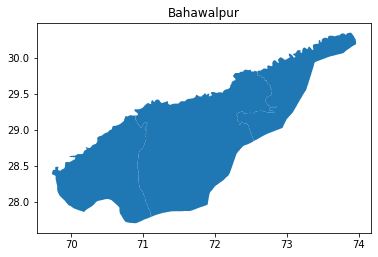

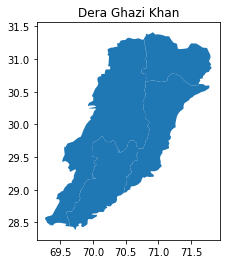

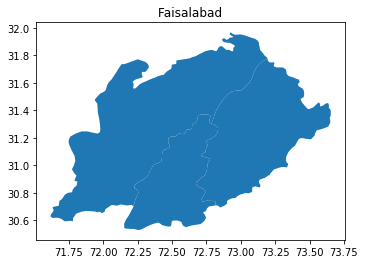

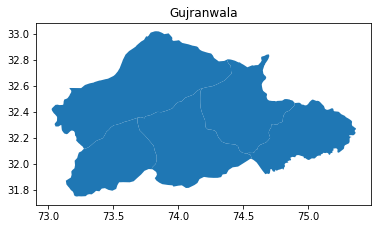

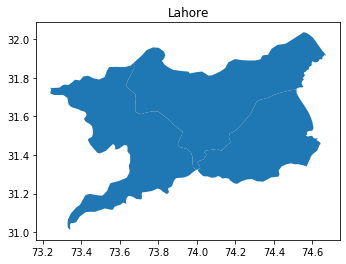

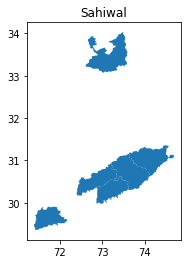

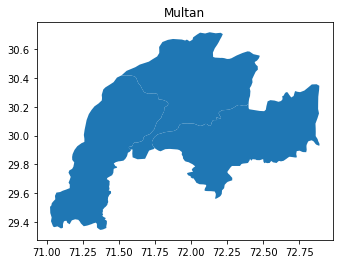

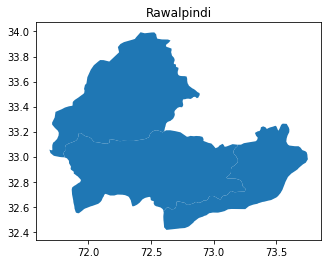

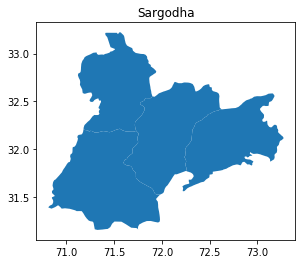

In [46]:
for division in li:
    df_merged[df_merged['division']==division].plot()
    plt.title(division)

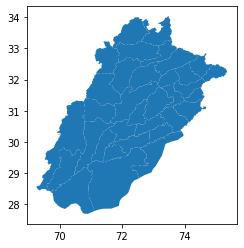

In [56]:
df_merged['geometry'].plot()

/home/drogon/.local/lib/python3.6/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/drogon/.local/lib/python3.6/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/drogon/.local/lib/python3.6/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

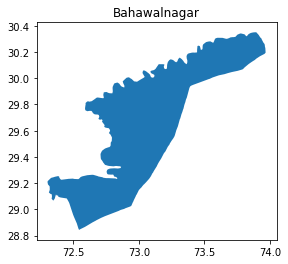

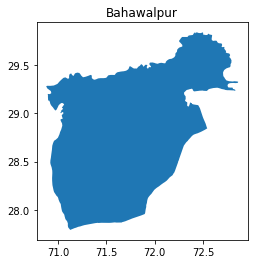

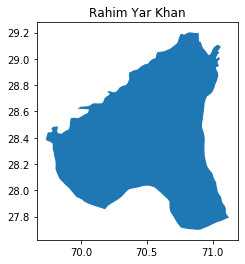

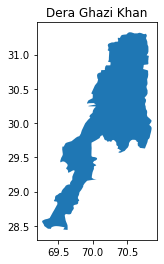

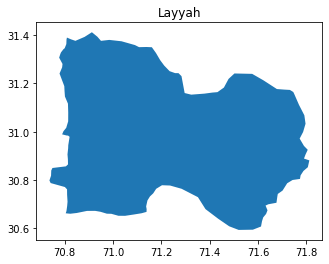

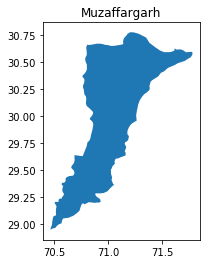

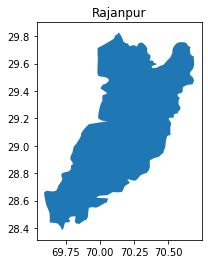

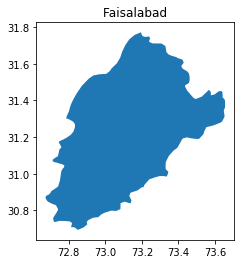

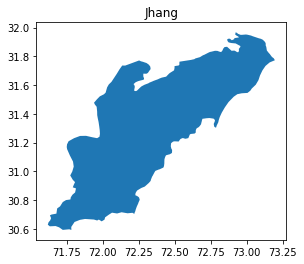

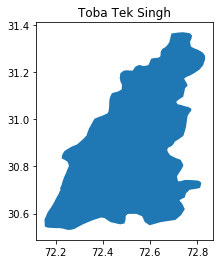

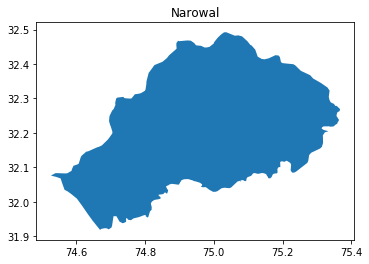

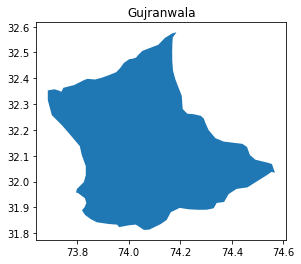

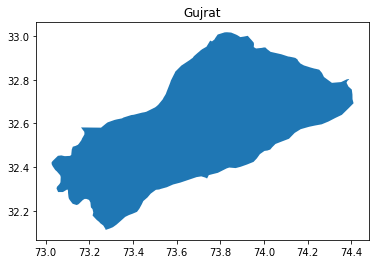

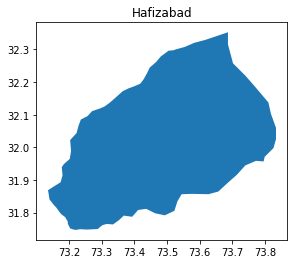

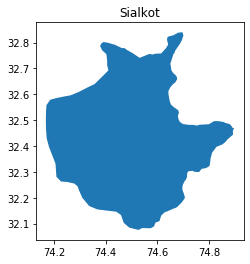

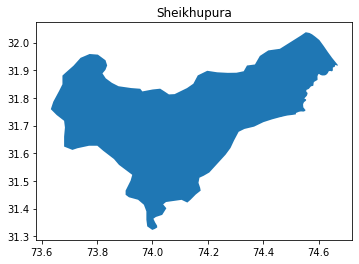

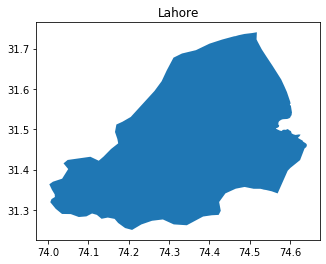

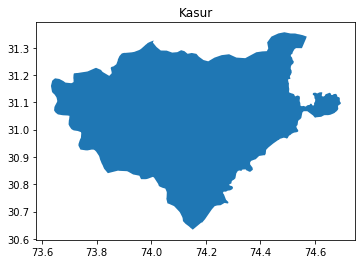

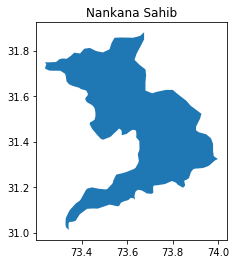

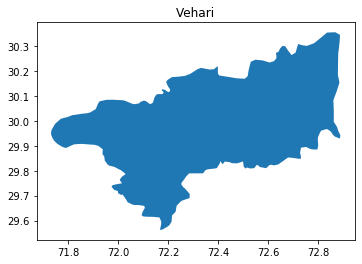

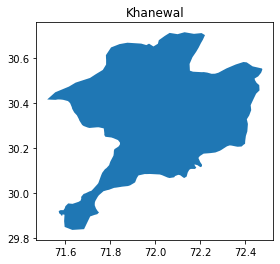

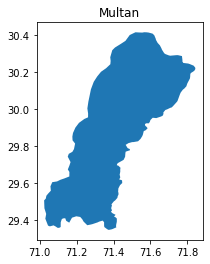

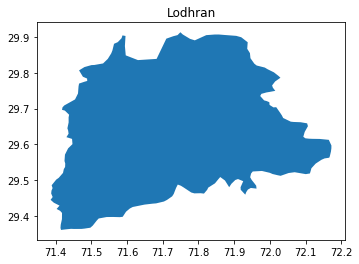

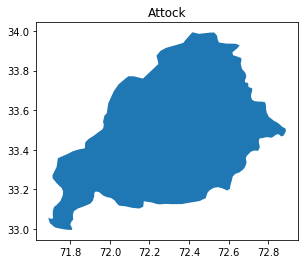

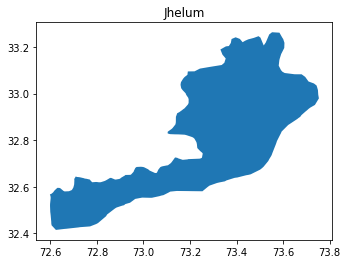

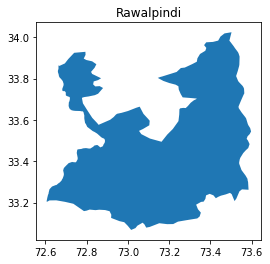

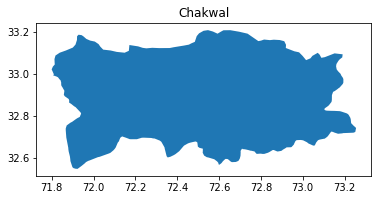

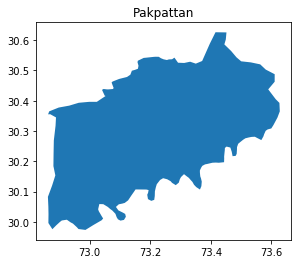

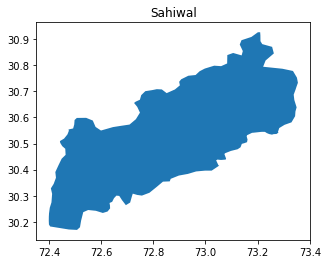

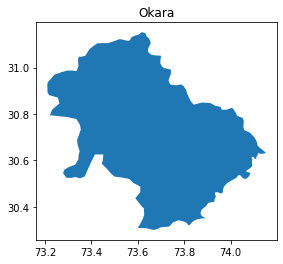

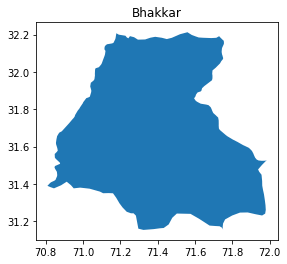

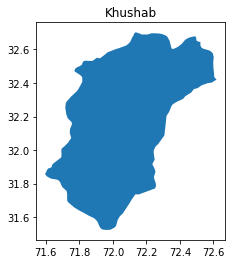

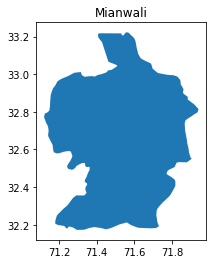

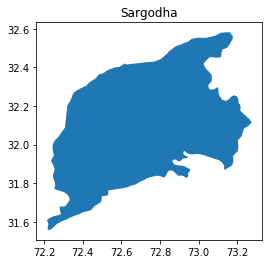

In [58]:
for district in dist:
    df_merged[df_merged['district']==district].plot()
    plt.title(district)

In [1]:
df_merged.plot()

NameError: name 'df_merged' is not defined